In [1]:
from __future__ import division, print_function
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras.layers.recurrent import LSTM
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import os
import matplotlib.pyplot as plt
data = np.load('/home/chase/Boyka/Lyu/fac_cond256_unit8.npz')
raw_X=data['cond']
raw_Y=data['fac'][:,0]
raw_Y=raw_Y.astype(np.float64)
NUM_TIMESTEPS = 65
HIDDEN_SIZE = 10
BATCH_SIZE = 128   
NUM_EPOCHS = 3000
Xtrain=raw_X[:-1000]
Ytrain=raw_Y[:-1000]
Xtest=raw_X[-1000:]
Ytest=raw_Y[-1000:]
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(2000, 65, 1) (1000, 65, 1) (2000,) (1000,)


In [2]:
model = Sequential()
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True,activation='relu')))
model.add(BatchNormalization())
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True,activation='relu')))
model.add(BatchNormalization())
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True,activation='relu')))
model.add(BatchNormalization())
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True,activation='relu'))
model.add(BatchNormalization())
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=False,activation='relu'))
model.add(BatchNormalization())
# model.add(Activation('tanh'))
model.add(Dense(1))
model.summary()

model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 65, 10)            480       
_________________________________________________________________
lstm_1 (LSTM)                (None, 65, 10)            840       
_________________________________________________________________
lstm_2 (LSTM)                (None, 65, 10)            840       
_________________________________________________________________
lstm_3 (LSTM)                (None, 65, 10)            840       
_________________________________________________________________
lstm_4 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 3,851
Trainable params: 3,851
Non-trainable params: 0
______________________________________________________

In [ ]:
history=model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(Xtest, Ytest),shuffle=True)

 
score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)
rmse = math.sqrt(score)


Epoch 1/3000
16/16 [==============================] - 16s 641ms/step - loss: 9.8874 - mean_squared_error: 9.8874 - val_loss: 9.0803 - val_mean_squared_error: 9.0803
Epoch 2/3000
16/16 [==============================] - 10s 609ms/step - loss: 7.6387 - mean_squared_error: 7.6387 - val_loss: 5.4044 - val_mean_squared_error: 5.4044
Epoch 3/3000
16/16 [==============================] - 10s 624ms/step - loss: 3.4378 - mean_squared_error: 3.4378 - val_loss: 1.8202 - val_mean_squared_error: 1.8202
Epoch 4/3000
16/16 [==============================] - 10s 637ms/step - loss: 1.4474 - mean_squared_error: 1.4474 - val_loss: 1.3515 - val_mean_squared_error: 1.3515
Epoch 5/3000
16/16 [==============================] - 10s 653ms/step - loss: 1.3566 - mean_squared_error: 1.3566 - val_loss: 1.3329 - val_mean_squared_error: 1.3329
Epoch 6/3000
16/16 [==============================] - 10s 651ms/step - loss: 1.3348 - mean_squared_error: 1.3348 - val_loss: 1.3329 - val_mean_squared_error: 1.3329
Epoch 7/30

NameError: name 'pre' is not defined

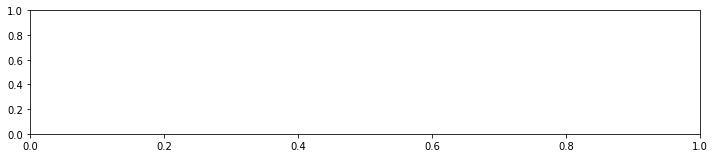

In [3]:
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
 
pre = model.predict(Xtest, batch_size=BATCH_SIZE)

plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(pre,label='predctions')
plt.subplot(212)
plt.plot(Ytest,label='origin')
plt.legend()
plt.show()

In [22]:
cond=data['cond']

In [23]:
import matplotlib.pyplot as plt

In [24]:
cond

array([[[0.       ],
        [0.195109 ],
        [0.390114 ],
        ...,
        [0.738601 ],
        [0.737473 ],
        [0.736409 ]],

       [[0.       ],
        [0.471118 ],
        [0.901411 ],
        ...,
        [0.714287 ],
        [0.713443 ],
        [0.712635 ]],

       [[0.       ],
        [0.170154 ],
        [0.340114 ],
        ...,
        [0.738722 ],
        [0.737014 ],
        [0.735351 ]],

       ...,

       [[0.       ],
        [0.0992303],
        [0.198461 ],
        ...,
        [0.734291 ],
        [0.732523 ],
        [0.730835 ]],

       [[0.       ],
        [0.208329 ],
        [0.41603  ],
        ...,
        [0.743918 ],
        [0.743    ],
        [0.742113 ]],

       [[0.       ],
        [0.5256   ],
        [0.973057 ],
        ...,
        [0.732028 ],
        [0.731248 ],
        [0.730491 ]]])

In [25]:
fac

array([['1.526151\n', '0.795865\n', '0.006569\n'],
       ['2.052302\n', '0.841730\n', '0.013138\n'],
       ['2.578453\n', '0.787595\n', '0.019706\n'],
       ...,
       ['2.401155\n', '0.753310\n', '0.013189\n'],
       ['2.927307\n', '0.799175\n', '0.019758\n'],
       ['3.453458\n', '0.845040\n', '0.026327\n']], dtype='<U9')

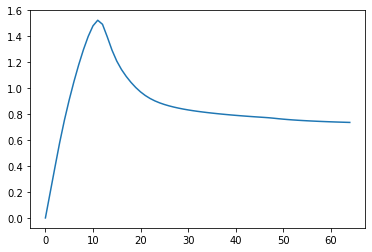

In [29]:
plt.plot([i for i in range(len(cond[0]))],cond[0])

In [32]:
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
from keras.models import Sequential, load_model

In [33]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))

In [37]:
numpy.savez('E:/fac_cond256_unit8/data.npz',cond,fac)

In [35]:
from __future__ import division, print_function
import torch
import torch.nn as nn
import numpy as np
import math
import os
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb

NameError: name 'dataset' is not defined